# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | greymouth
Processing Record 4 of Set 1 | serowe
Processing Record 5 of Set 1 | inari
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | conception bay south
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | tazovsky
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | pacific grove
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,48.88,73,46,7.29,RO,1698883307
1,cabo san lucas,22.8909,-109.9124,85.60,65,20,9.22,MX,1698883599
2,greymouth,-42.4667,171.2000,56.41,92,96,12.26,NZ,1698883600
3,serowe,-22.3833,26.7167,54.63,86,98,11.70,BW,1698883600
4,inari,68.9060,27.0288,23.20,97,91,4.99,FI,1698883600


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,48.88,73,46,7.29,RO,1698883307
1,cabo san lucas,22.8909,-109.9124,85.60,65,20,9.22,MX,1698883599
2,greymouth,-42.4667,171.2000,56.41,92,96,12.26,NZ,1698883600
3,serowe,-22.3833,26.7167,54.63,86,98,11.70,BW,1698883600
4,inari,68.9060,27.0288,23.20,97,91,4.99,FI,1698883600


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

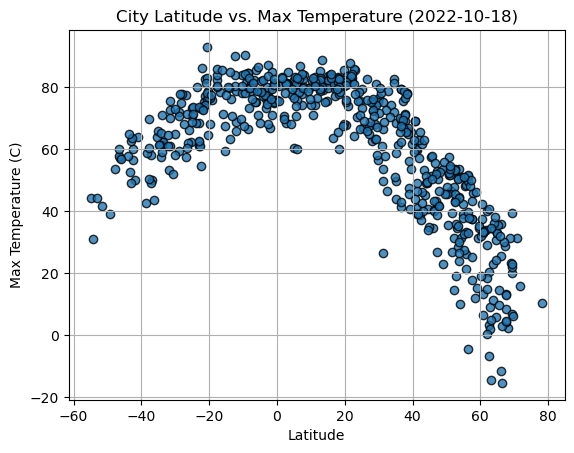

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis,y_axis,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

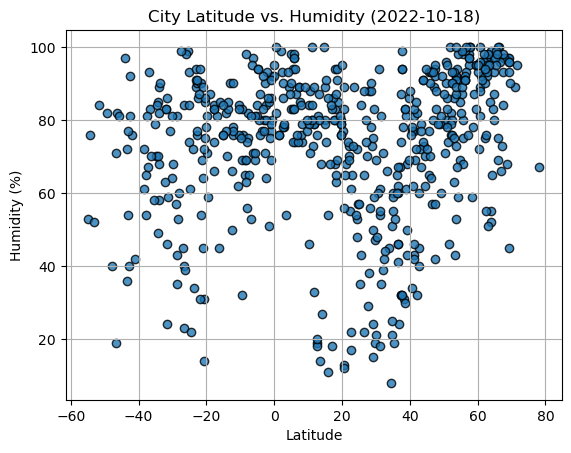

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis,y_axis,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

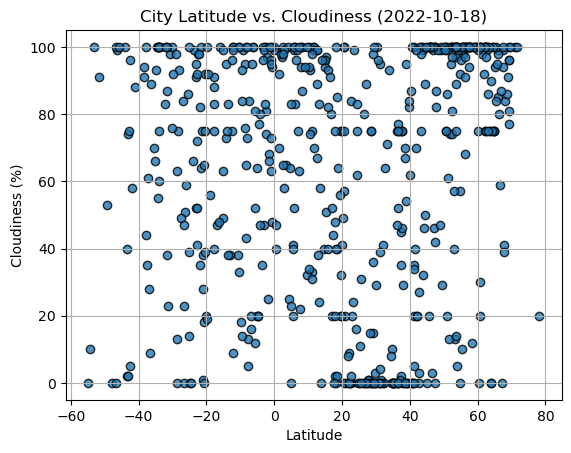

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis,y_axis,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

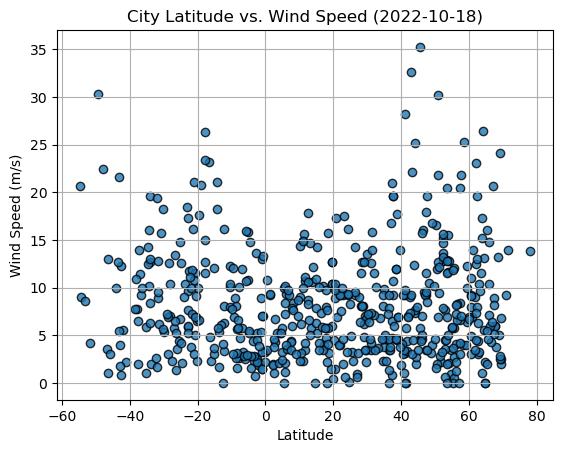

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis,y_axis,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,48.88,73,46,7.29,RO,1698883307
1,cabo san lucas,22.8909,-109.9124,85.60,65,20,9.22,MX,1698883599
4,inari,68.9060,27.0288,23.20,97,91,4.99,FI,1698883600
8,bethel,41.3712,-73.4140,41.02,81,20,0.00,US,1698883601
10,whitehorse,60.7161,-135.0538,33.31,89,20,8.01,CA,1698883601


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,greymouth,-42.4667,171.2000,56.41,92,96,12.26,NZ,1698883600
3,serowe,-22.3833,26.7167,54.63,86,98,11.70,BW,1698883600
5,avarua,-21.2078,-159.7750,77.05,69,75,16.11,CK,1698883600
6,waitangi,-43.9535,-176.5597,57.81,97,100,10.00,NZ,1698883338
7,port-aux-francais,-49.3500,70.2167,39.00,82,53,30.27,TF,1698883600


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8649549632181898


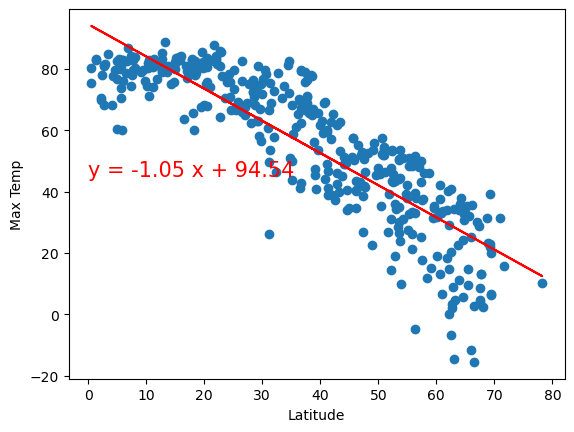

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, 'Max Temp', (0,45))

The r-value is: 0.7560999766353128


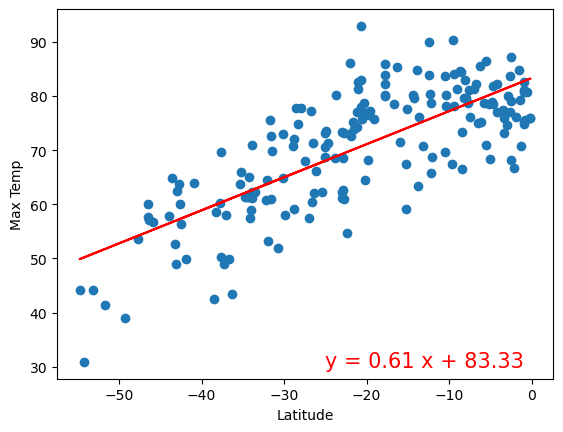

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, 'Max Temp', (-25,30))

**Discussion about the linear relationship:** 
The temperature vs. latitude in the Northern Hemisphere linear regression line shoes that these two have a negative linear relationship. The regression line shows that the further north you move, the temperature decreases by 0.44 degrees per latitude degree. The temperature vs. latitude in the Southern Hemisphere linear regression line shoes that these have a positive linear relationship. The regression line shows that the further south you move, temperature tends to increase by 0.88 degrees per latitude degree.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22613556699527146


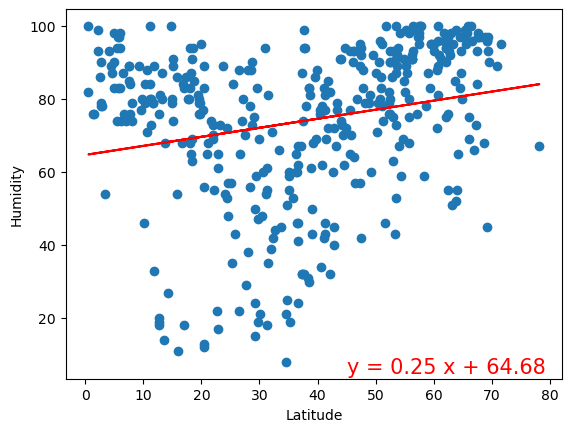

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values, 'Humidity', (45,5))

The r-value is: 0.2572012019955445


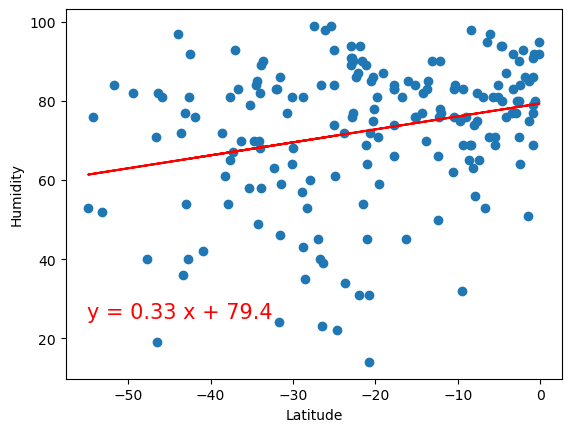

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values, 'Humidity', (-55,25))

**Discussion about the linear relationship:** 
The humidity vs. latitude in the Northern Hemisphere linear regression line shows that these two have a very weak positive relationship, indicated by the slope of 0.07 which is close to zero. The increase in humidity with increasing latitude is insignificant in the Nothern Hemisphere based on this regression model. The linear regression line of humidity vs. latitude in the Southern Hemisphere has a very weak negative relationship. Similar to the Northern Hemisphere, the slope of -0.15 indicates a slightly negative relationship, meaning that there is a very small tendency for humidity to decrease slightly as you move southward; however, the relationship is insignificant based on this regression model.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22311579145351498


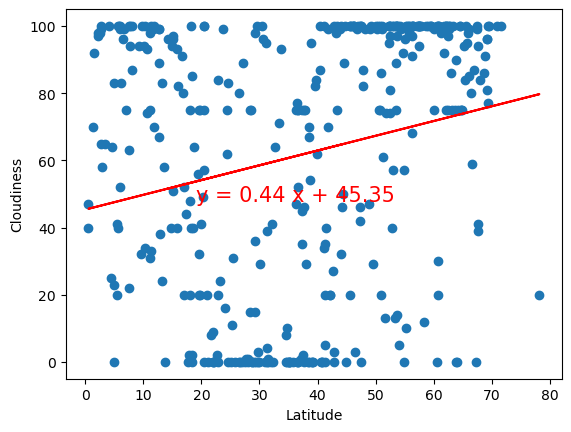

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values, 'Cloudiness', (19,48))

The r-value is: 0.09936522176118476


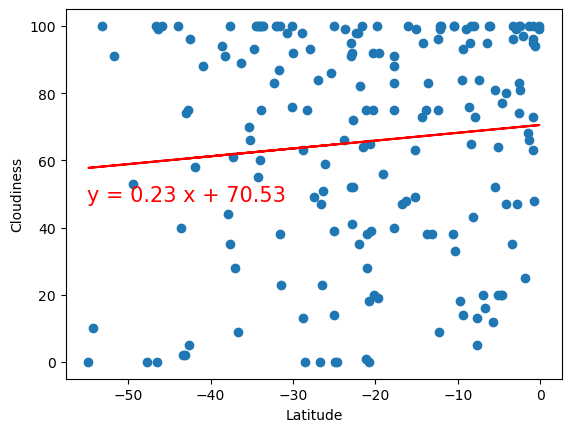

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,48))

**Discussion about the linear relationship:** 
In the Northern Hemisphere, the linear regression analysis shows a slight negative linear association between cloudiness and latitude. The negative slope of -0.2 suggests a subtle tendency for cloudiness to diminish as one moves northward. According to this regression model, the impact of latitude on cloudiness appears to be relatively minor. Meanwhile, in the Southern Hemisphere, the linear regression line indicates a moderately negative linear relationship between cloudiness and latitude. This implies that, on average, cloudiness tends to decrease as one moves from the equator towards higher latitudes in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1328758884471092


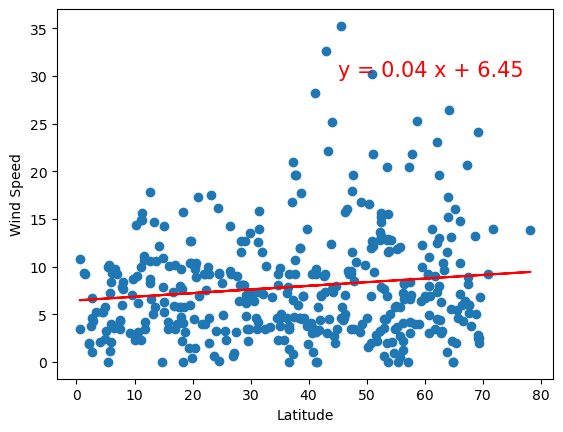

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values, 'Wind Speed', (45,30))

The r-value is: -0.2238269741416495


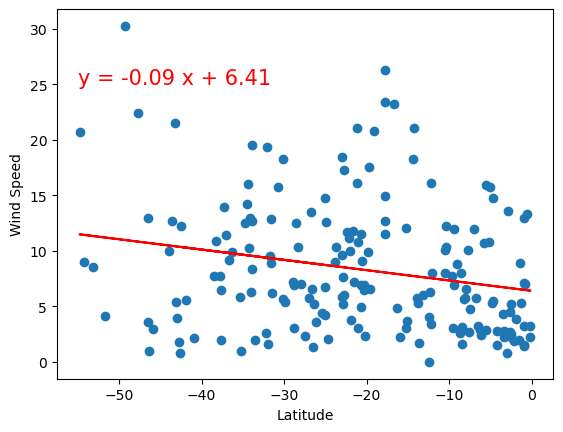

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values, 'Wind Speed', (-55,25))

**Discussion about the linear relationship:** In the Northern Hemisphere, the linear regression analysis reveals an extremely weak negative association between wind speed and latitude. The close-to-zero slope of -0.05 indicates a very slight tendency for wind speed to marginally decrease as one moves northward, although this relationship is not significant. Similarly, in the Southern Hemisphere, the linear regression line shows that the effect of latitude on wind speed is almost negligible, as indicated by the nearly-zero slope of -0.02 in this regression model.